In [179]:
from pandas import read_csv
from lib.utils import *
from torch import nn
import torch

,P,S,W
total,82.000000,704.666667,651.833333
average,79.354839,222.526316,219.719101
counts,62.000000,190.000000,178.000000


,P,S,W
total,90.166667,761.000000,587.333333
average,77.285714,278.414634,262.985075
counts,70.000000,164.000000,134.000000


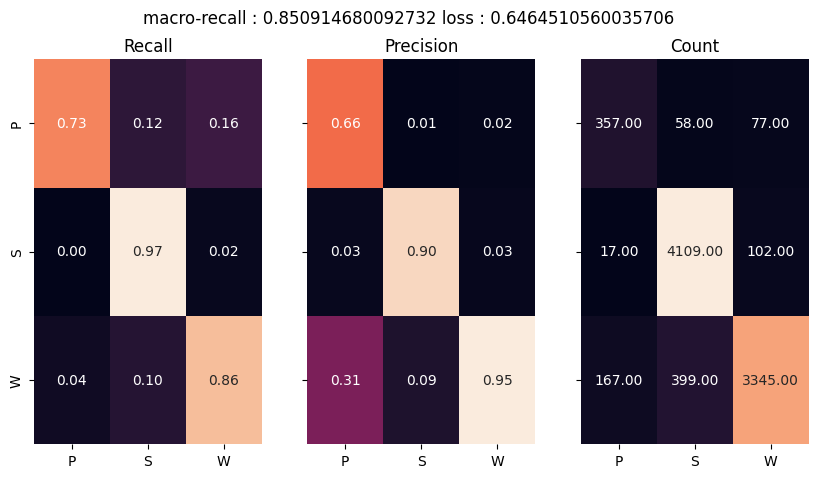

In [183]:
i = 9
df = read_csv(f'4_scored/{i}.csv.csv')
df['true'] = read_csv(f'../data/alpha_sleep/{i}.csv')['label']
df = df.rename({'0':'pred'},axis=1)
df = df[df['pred'] != 'X']
df = df[df['true'] != 'X']
display(get_bout_statistics_for_predictions(df['true']))
display(get_bout_statistics_for_predictions(df['pred']))
y_pred = nn.functional.one_hot(torch.tensor(pd.Categorical(df['pred']).codes).long(),3).float()
y_true = nn.functional.one_hot(torch.tensor(pd.Categorical(df['true']).codes).long(),3).float()
cms(y_pred=y_pred.argmax(axis=1),y_true=y_true.argmax(axis=1),loss=nn.CrossEntropyLoss()(y_true,y_pred))

In [185]:
fig = px.line(data_frame=df,y=['true','pred'])
fig.show(renderer='browser')

In [ ]:
from pandas import read_csv
from sklearn.metrics import recall_score,precision_score,f1_score
recalls = []
precisions = []
f1s = []
stats_true = pd.DataFrame()
stats_pred = pd.DataFrame()
losses = []
for i in tqdm(range(32)):
    df = read_csv(f'4_scored/{i}.csv.csv')
    df['true'] = read_csv(f'../data/alpha_sleep/{i}.csv')['label']
    df = df.rename({'0':'pred'},axis=1)
    df = df[df['pred'] != 'X']
    df = df[df['true'] != 'X']
    
    stats_predi = get_bout_statistics_for_predictions(df['pred'])
    stats_truei = get_bout_statistics_for_predictions(df['true'])

    stats_pred = pd.concat([stats_pred,stats_predi.reset_index().melt(id_vars='index')])
    stats_true = pd.concat([stats_true,stats_truei.reset_index().melt(id_vars='index')])
    
    y_pred = nn.functional.one_hot(torch.tensor(pd.Categorical(df['pred']).codes).long(),3).float()
    y_true = nn.functional.one_hot(torch.tensor(pd.Categorical(df['true']).codes).long(),3).float()

    losses.append(nn.CrossEntropyLoss()(y_true,y_pred))

    y_pred = y_pred.argmax(axis=1)
    y_true = y_true.argmax(axis=1)

    recall = recall_score(y_true=y_true,y_pred=y_pred,average='macro')
    precision = precision_score(y_true=y_true,y_pred=y_pred,average='macro')
    f1 = f1_score(y_true=y_true,y_pred=y_pred,average='macro')
    
    recalls.append(recall)
    precisions.append(precision)
    f1s.append(f1)

In [181]:
print(f1s)
print(torch.tensor(f1s).mean())
print(torch.tensor(f1s).std())
print(recalls)
print(torch.tensor(recalls).mean())
print(torch.tensor(recalls).std())
print(precisions)
print(torch.tensor(precisions).mean())
print(torch.tensor(precisions).std())

[0.8734888194154825, 0.8693671521168387, 0.8237816958326906, 0.7905111171535327, 0.18127545795863595, 0.7654528453669567, 0.8713931095690873, 0.8938725383217371, 0.5564066778902262, 0.8418299180633194, 0.84443739480255, 0.8155401019055443, 0.859606817161601, 0.8142463914783652, 0.8224389922392786, 0.8050806534140754, 0.7959463125154208, 0.7491079714733314, 0.8011686223050963, 0.05008103123131874, 0.8607426622177327, 0.7446931471656196, 0.7953939862647759, 0.794017697448302, 0.7474147588846942, 0.7287873163177033, 0.8013623000873663, 0.7563519048879951, 0.8311661284266295, 0.8368220372884957, 0.7941342269891329, 0.742845736097244]
tensor(0.7581, dtype=torch.float64)
tensor(0.1803, dtype=torch.float64)
[0.8969366080024482, 0.8726072251412816, 0.8580627111934295, 0.8578573274408497, 0.30744053893959017, 0.8295479367788765, 0.8511536124528, 0.8769097843946456, 0.5498367604617604, 0.850914680092732, 0.8275442506554928, 0.825923507962265, 0.8894997927627036, 0.88457303030443, 0.8602955624234

In [ ]:
stats_pred['type'] = 'pred'
stats_true['type'] = 'true'

stats = pd.concat([stats_pred,stats_true])
sns.displot(data=stats.reset_index(drop=True),x='value',hue='type',col='index',row='variable',kind='kde')